# Singular Value Decomposition

For every $m \times n$ matrix $A$ of rank $r$, 

$A = U \Sigma V^T = \sigma_1 u_1 v_1^T + \cdots + \sigma_r u_r v_r^T$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from plot_helper import *

## M is not a symmetric matrix

In [4]:
M = np.array([[2, 0.1],[1, 2]])

In [5]:
evals, C = np.linalg.eig(M)

In [6]:
D = np.diag(evals)

In [7]:
D

array([[2.31622777, 0.        ],
       [0.        , 1.68377223]])

In [8]:
C

array([[ 0.30151134, -0.30151134],
       [ 0.95346259,  0.95346259]])

## Check the eigenvectors below

* Orthogonal?
* Along the major & minor axes of the ellipse?

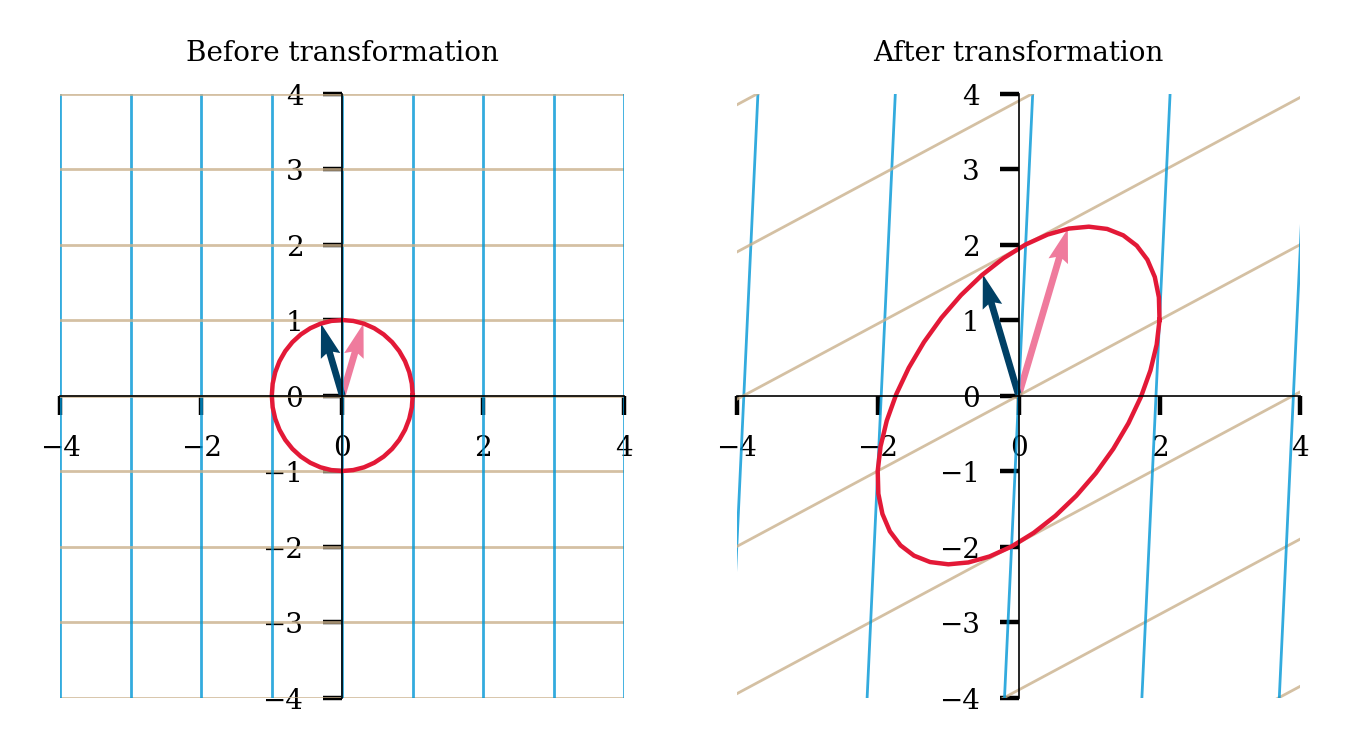

In [9]:
plot_linear_transformation(M, C[:,0], C[:,1], unit_vector=False, unit_circle=True)

## Find the vectors along the major / minor axes of ellipse (i.e. after transformation)

In [37]:
alpha = np.linspace(0, 2*numpy.pi, 5001)
circle = np.vstack((np.cos(alpha), np.sin(alpha)))
ellipse = M @ circle    

In [38]:
lengths = np.linalg.norm(ellipse, axis=0)
major = ellipse[:,np.argmax(lengths)]
minor = ellipse[:,np.argmin(lengths)]

### Get major / minor representations before transformation

In [63]:
E = np.column_stack((major,minor))

In [64]:
M_inv = np.linalg.inv(M)
V = M_inv @ E

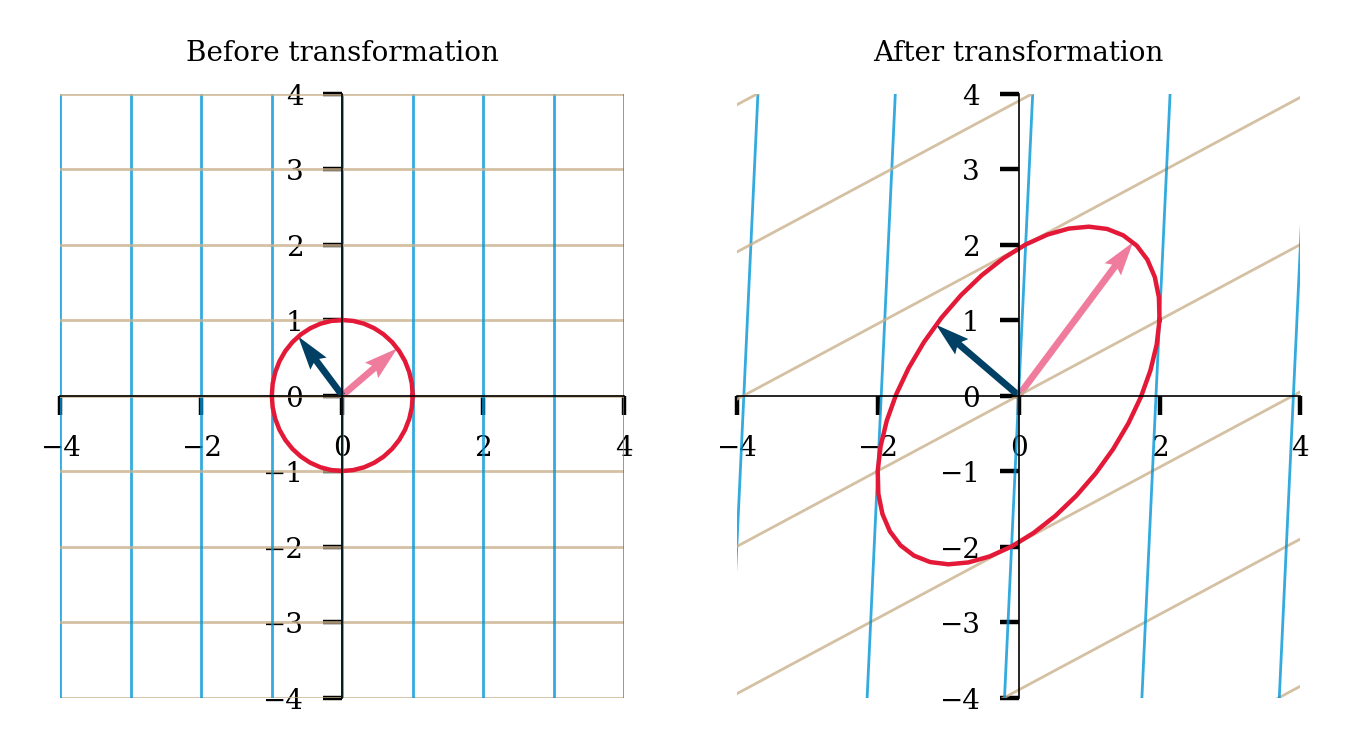

In [65]:
plot_linear_transformation(M, V[:,0], V[:,1], unit_vector=False, unit_circle=True)

In [77]:
V.T @ V

array([[1.00000000e+00, 2.75349313e-16],
       [2.75349313e-16, 1.00000000e+00]])

In [78]:
E.T @ E

array([[ 6.75999998e+00, -3.29950550e-04],
       [-3.29950550e-04,  2.25000002e+00]])

In [81]:
s = np.linalg.norm(E,axis=0)

In [85]:
s

array([2.6       , 1.50000001])

## $MV = \Sigma U \equiv M = \Sigma U V^{-1} \equiv M = \Sigma U V^T$

In [82]:
U = E / s

In [83]:
M @ V

array([[ 1.62412143, -1.17142204],
       [ 2.03032745,  0.93689404]])

In [84]:
s * U

array([[ 1.62412143, -1.17142204],
       [ 2.03032745,  0.93689404]])

In [104]:
S = np.diag(s)
S

array([[2.6       , 0.        ],
       [0.        , 1.50000001]])

In [105]:
U @ S @ V.T

array([[2. , 0.1],
       [1. , 2. ]])

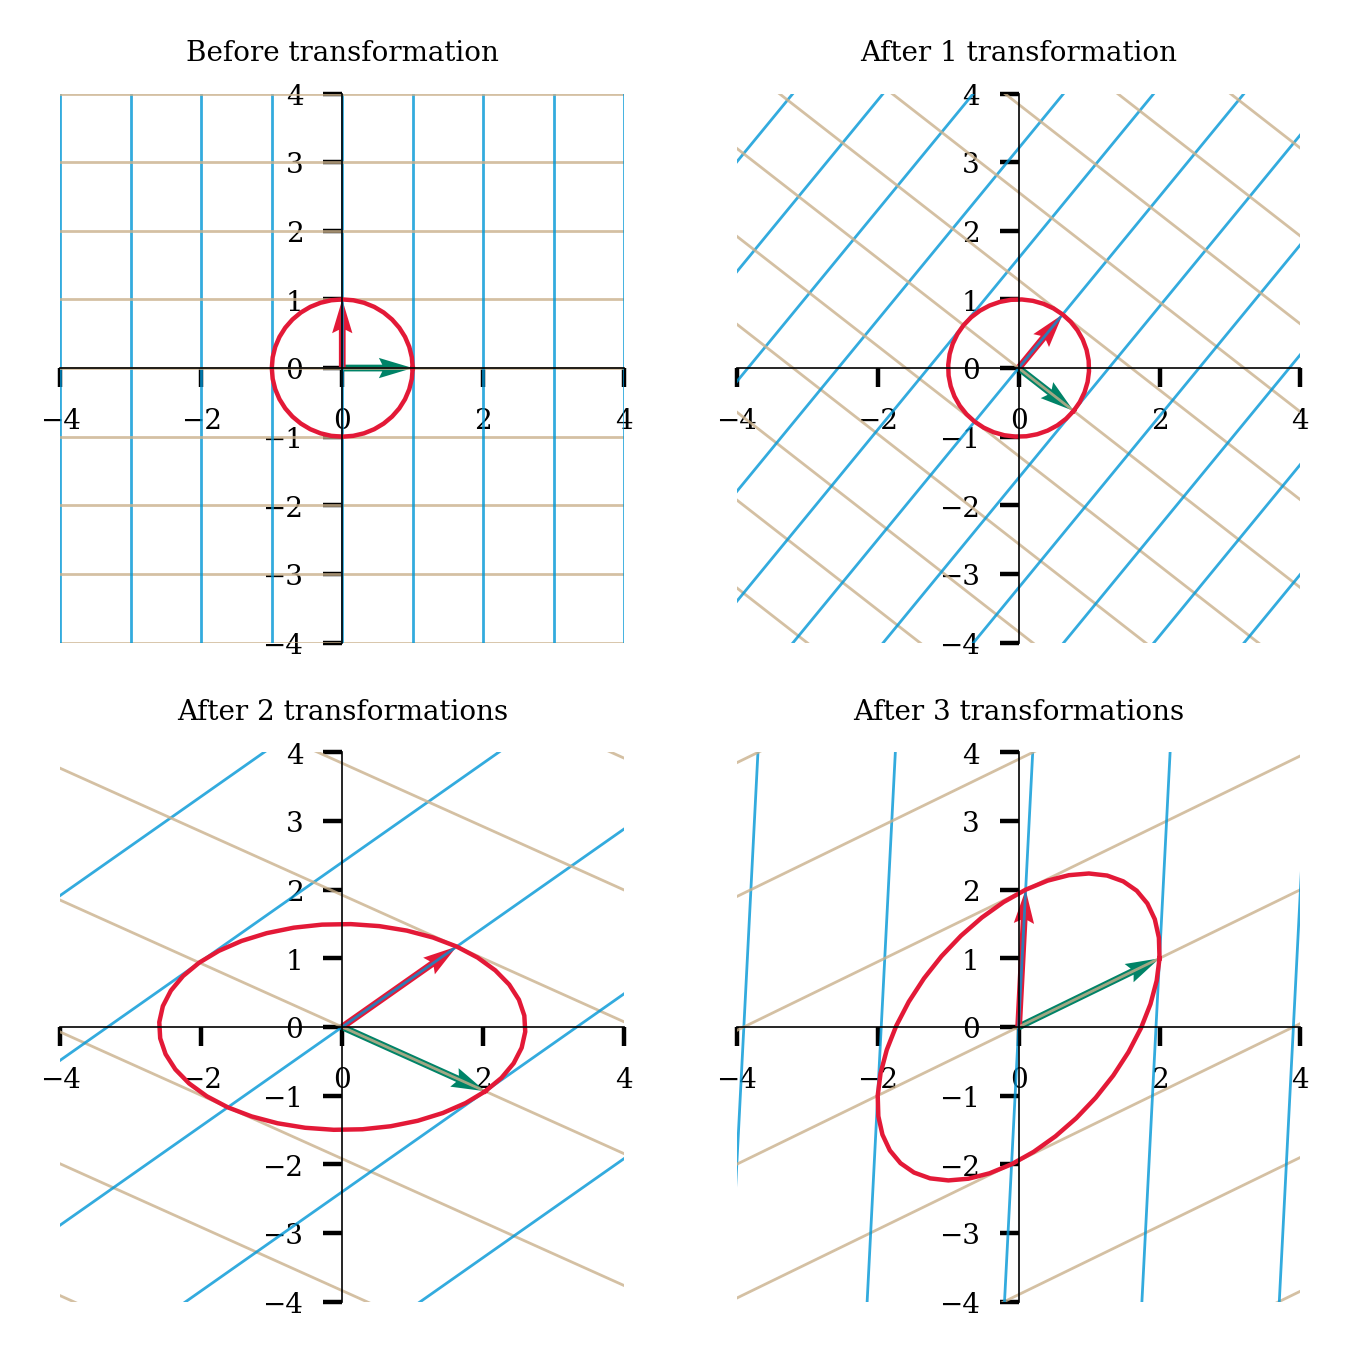

In [109]:
plot_linear_transformations(V.T,S,U, unit_circle=True)

In [92]:
np.linalg.svd(M)

(array([[-0.62469505, -0.78086881],
        [-0.78086881,  0.62469505]]),
 array([2.6, 1.5]),
 array([[-0.78086881, -0.62469505],
        [-0.62469505,  0.78086881]]))

In [93]:
s

array([2.6       , 1.50000001])

In [94]:
U

array([[ 0.62466209, -0.78094802],
       [ 0.78089518,  0.62459602]])

In [95]:
V

array([[ 0.7808231 , -0.62475217],
       [ 0.62475217,  0.7808231 ]])

### Eigendecomposition of $M^T M$ vs. SVD of $M$

\begin{align}
M =& U \Sigma V^T \\
M^TM =& (U \Sigma V^T)^T (U \Sigma V^T) \\
     =& (V \Sigma^2 V^T)
\end{align}


In [115]:
evals, C = np.linalg.eig(M.T@M)

In [116]:
evals

array([6.76, 2.25])

In [117]:
s**2

array([6.75999998, 2.25000002])

In [118]:
C

array([[ 0.78086881, -0.62469505],
       [ 0.62469505,  0.78086881]])

In [119]:
V

array([[ 0.7808231 , -0.62475217],
       [ 0.62475217,  0.7808231 ]])

In [120]:
S

array([[2.6       , 0.        ],
       [0.        , 1.50000001]])

# References

1. https://in.mathworks.com/company/newsletters/articles/professor-svd.html
1. https://www.youtube.com/watch?v=mBcLRGuAFUk